<a href="https://colab.research.google.com/github/disakuz/Test_for_job/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_Topface_%D0%9A%D1%83%D0%B7%D1%8C%D0%BC%D0%B8%D0%BD_%D0%94_%D0%90_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Доступ к датафрейму: https://docs.google.com/spreadsheets/d/17tvbjt-WkZNGoODdL5ORWDSknfS7sQxN/edit?usp=sharing&ouid=105740097100282595367&rtpof=true&sd=true

В файле «data.xlsx» представлены данные по поступлению денежных средств от
клиентов компании N за покупку ее услуг.
Имеющиеся поля:   
● client_id - ID клиента;   
● sum – сумма денежных средств;  
● status – статус оплаты;  
● sale – менеджер, заключивший сделку;
● new/current – статус сделки;  
● document – наличие оригинала подписанного договора с клиентом;  
● receiving_date – дата получения оригинала договора.  
Вопросы:  
1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.  
2) Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.  
3) Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?  
4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?  
5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?  

In [54]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [73]:
!gdown --id 17tvbjt-WkZNGoODdL5ORWDSknfS7sQxN

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17tvbjt-WkZNGoODdL5ORWDSknfS7sQxN
To: /content/Копия data.xlsx
100% 36.9k/36.9k [00:00<00:00, 109MB/s]


In [74]:
df = pd.read_excel('/content/Копия data.xlsx')

In [75]:
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


In [77]:
df.isna().mean()

client_id         0.008219
sum               0.008219
status            0.000000
sale              0.008219
new/current       0.008219
Unnamed: 5        1.000000
document          0.028767
receiving_date    0.168493
dtype: float64

In [78]:
df = df.drop('Unnamed: 5', axis=1)

In [79]:
df.head()

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00


In [80]:
df['status'].unique()

array(['Май 2021', 'ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'Июнь 2021',
       'Июль 2021', 'Август 2021', 'В РАБОТЕ', 'Сентябрь 2021',
       'Октябрь 2021', 'НА ПОДПИСАНИИ'], dtype=object)

In [81]:
df.replace('-', np.NaN)

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaT
1,6.0,11693.7,ВНУТРЕННИЙ,NaN,NaN,NaN,NaT
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08


In [82]:
df['receiving_date'] = pd.to_datetime(df['receiving_date'],errors='coerce')

In [83]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       724 non-null    float64       
 1   sum             724 non-null    float64       
 2   status          730 non-null    object        
 3   sale            724 non-null    object        
 4   new/current     724 non-null    object        
 5   document        709 non-null    object        
 6   receiving_date  606 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 40.0+ KB


In [84]:
df['month'] = df['receiving_date'].dt.to_period('m')

In [85]:
df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaT,NaT
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,NaT,NaT
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,2021-07
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021-06
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021-06


In [86]:
df.replace('-',np.NaN)

,client_id,sum,status,sale,new/current,document,receiving_date,month
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaT,NaT
1,6.0,11693.7,ВНУТРЕННИЙ,NaN,NaN,NaN,NaT,NaT
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,2021-07
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021-06
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021-06
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,2021-11
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT,NaT
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT,NaT
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,2021-11


In [87]:
df['status'] = df['status'].isin(['ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО','В РАБОТЕ','НА ПОДПИСАНИИ'])

In [88]:
df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
0,NaN,NaN,False,NaN,NaN,NaN,NaT,NaT
1,6.0,11693.7,True,-,-,-,NaT,NaT
2,14.0,5452.7,True,Петрова,новая,оригинал,2021-07-26,2021-07
3,15.0,13991.7,True,Иванов,текущая,оригинал,2021-06-08,2021-06
4,16.0,719.7,True,Иванов,текущая,оригинал,2021-06-08,2021-06


###Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [89]:
df_jule = df.loc[((df['month'] == '2021-07') & (df['status' ] != 'ПРОСРОЧЕНО'))]

In [93]:
df_jule['sum'].agg(['count','mean','sum'])

count       118.000000
mean       6497.749492
sum      766734.440000
Name: sum, dtype: float64

Выручка за июль 2021 года составила 766734 у.е.

###Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.

In [97]:
df_jule.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
2,14.0,5452.70,True,Петрова,новая,оригинал,2021-07-26,2021-07
5,18.0,4253.70,True,Иванов,текущая,оригинал,2021-07-07,2021-07
6,20.0,5796.70,True,Кузнецова,текущая,оригинал,2021-07-15,2021-07
12,32.0,7353.90,True,Филимонова,текущая,оригинал,2021-07-09,2021-07
13,34.0,3892.52,True,Филимонова,текущая,оригинал,2021-07-09,2021-07


In [106]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Change sum to date in jule')

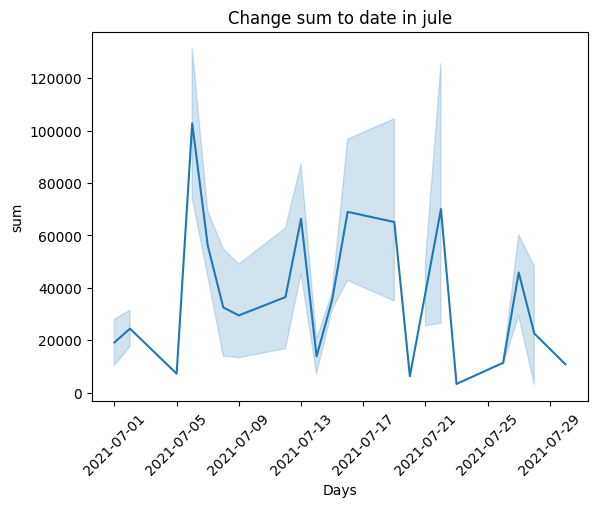

In [107]:
sns.lineplot(data=df_jule, x="receiving_date", y='sum', estimator = "sum")
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('sum')
plt.title('Change sum to date in jule')

График изменения выручки в июле 2021 года

###Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [108]:
df_sep = df.loc[(df['month'] == '2021-09')]

In [109]:
df_sep.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
21,46.0,4945.7,True,Петрова,текущая,оригинал,2021-09-23,2021-09
22,47.0,4449.7,True,Петрова,текущая,оригинал,2021-09-23,2021-09
23,49.0,7203.7,True,Петрова,текущая,оригинал,2021-09-23,2021-09
29,59.0,3938.7,True,Петрова,текущая,оригинал,2021-09-23,2021-09
133,18.0,2996.7,True,Иванов,текущая,оригинал,2021-09-09,2021-09


In [111]:
df_sep.groupby('sale')['sum'].sum().sort_values(ascending = False)

sale
Петрова       219240.12
Иванов        165314.80
Смирнов       155245.90
Андреев       124714.55
Кузнецова      60230.20
Васильев       55667.50
Филимонова     45763.30
Соколов        44234.60
Name: sum, dtype: float64

В сентябре 2021 года больше всего средств привлекла менеджер Петрова

### Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?  


In [112]:
df_oct = df.loc[(df['month'] == '2021-10')]

In [115]:
df_oct.groupby('new/current')['client_id'].count()

new/current
новая       17
текущая    105
Name: client_id, dtype: int64

В октябре значительно преобладают текущие сделки

### Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [116]:
df_may = df.loc[((df['month'] == '2021-05') & (df['document' ] == 'оригинал'))]

In [119]:
df_may.count()

client_id         4
sum               4
status            4
sale              4
new/current       4
document          4
receiving_date    4
month             4
dtype: int64

В мае 2021 всего было получено 4 оригинала договоров